In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pointbiserialr
df = sns.load_dataset("titanic")
import statsmodels.api as sm

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def check_df(dataframe, head=3):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Duplicate Values #####################")
    print(dataframe.duplicated().sum())

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### NA #####################")
    print(dataframe.isna().mean()*100)

    print("##################### Unique Values #####################")
    print(dataframe.nunique())



In [3]:
check_df(df)

##################### Shape #####################
(891, 15)
##################### Duplicate Values #####################
107
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### Head #####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    n

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Categorical Variables Analysis 

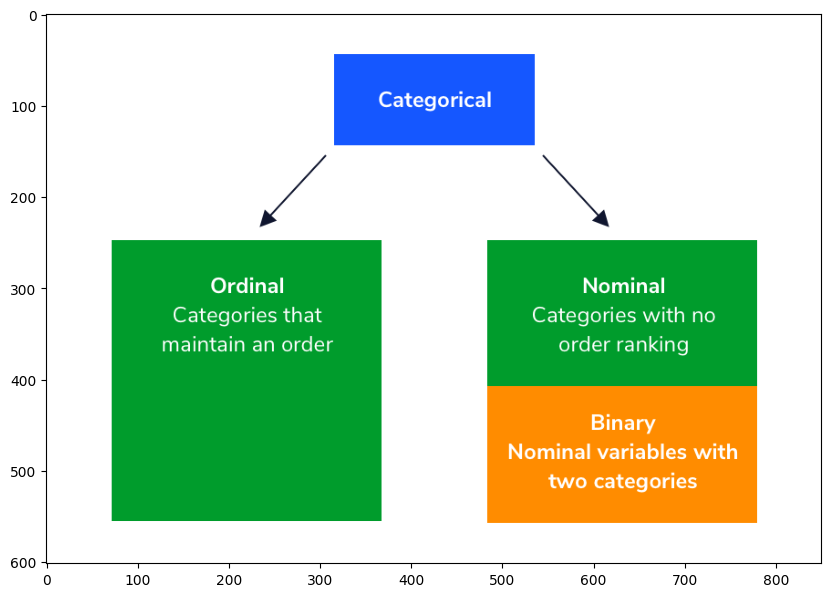

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('documents/Intro_to_variable_types_3.webp')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

**Categorical variables** \
*Nominal Variables*
-These are variables that have two or more categories, but which do not have an intrinsic order.\
-For example, a nominal categorical variable can be a person's gender, nationality, or the brand of a product!\

*Ordinal Variables*\
-These are categorical variables that have a clear ordering of the categories\
-For instance, an order customer satisfaction, with dinal categorical variable could be a rating scale categories like "Very Unsatisfied," "Unsatisfied," "Neutral," "Satisfied," and "Very Satisfied." 
\


In [6]:
# Count the number of occurrences of each unique value in the "survived" column.
df["survived"].value_counts()


survived
0    549
1    342
Name: count, dtype: int64

In [7]:
# Get the unique values from the "sex" column.
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [8]:
# Count the number of unique values in the "class" column.
df["class"].nunique()


3

In [9]:
categorical_types = ["category", "object", "bool"]
categorical_columns = [col for col in df.columns if str(df[col].dtypes) in categorical_types]
categorical_columns

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [10]:
def find_categorical_columns(df, max_unique_values=10, include_mixed_types=True):
    categorical_cols = []
    for col in df.columns:
        dtype = str(df[col].dtypes)       
        if dtype in ["category", "object", "bool"]:
            categorical_cols.append(col)
        elif include_mixed_types and pd.api.types.is_object_dtype(df[col]):
            categorical_cols.append(col)
        else:
            num_unique_values = df[col].nunique(dropna=False)
            if num_unique_values <= max_unique_values:
                categorical_cols.append(col)

    return categorical_cols

categorical_columns = find_categorical_columns(df)

In [11]:
categorical_columns

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [12]:
df[categorical_columns].head()

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,S,Third,man,True,NaN,Southampton,no,True


In [15]:
def plot_categorical_data(df, x, y, hue=None, kind='bar'):
    """
    Plots categorical data using seaborn's catplot function.

    Parameters:
    df (DataFrame): The DataFrame containing the data to plot.
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    hue (str, optional): The name of the column to be used for color encoding. Defaults to None.
    kind (str, optional): The kind of plot to draw. Defaults to 'bar'.

    Returns:
    A seaborn axis-level plot object.
    """
    plot = sns.catplot(data=df, x=x, y=y, hue=hue, kind=kind)
    return plot

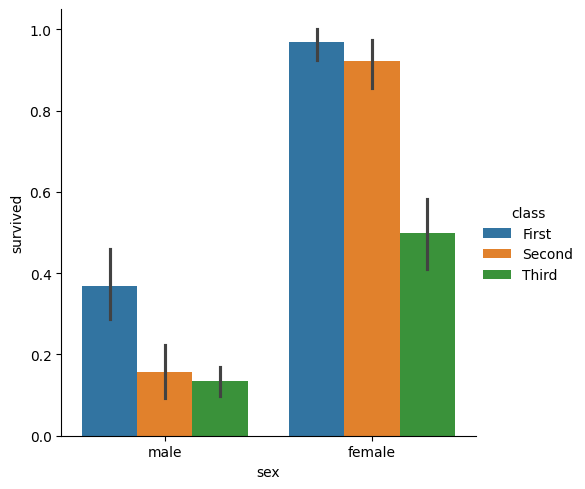

In [16]:
plot_categorical_data(df, x="sex", y="survived", hue="class", kind="bar") ;

<div class="alert alert-warning">
    
### English 
For males in the "First" class category, the error bar extends quite a bit above and below the bar, indicating that there's more uncertainty about the true survival rate for this group. This could be due to a smaller sample size or greater variability in survival outcomes within this group.
For females, the error bars are relatively shorter, especially for the "First" class, suggesting that the survival rate data for this group is less variable and the mean survival rate is estimated with more certainty.

 ### Deutsch


Für Männer in der Kategorie "Erste Klasse" erstreckt sich der Fehlerbalken ziemlich weit über und unter den Balken, was darauf hinweist, dass es mehr Unsicherheit über die wahre Überlebensrate für diese Gruppe gibt. Dies könnte auf eine kleinere Stichprobengröße oder eine größere Variabilität der Überlebensergebnisse innerhalb dieser Gruppe zurückzuführen sein.
Für Frauen sind die Fehlerbalken relativ kürzer, insbesondere für die "Erste Klasse", was darauf hindeutet, dass die Daten zur Überlebensrate für diese Gruppe weniger variabel sind und die durchschnittliche Überlebensrate mit größerer Sicherheit geschätzt wird.


</div>


In [17]:
def find_binary_columns(df, max_unique_values=2):
    binary_cols = []
    for col in df.columns:
        num_unique_values = df[col].nunique(dropna=False)
        if num_unique_values <= max_unique_values:
            binary_cols.append(col)
    return binary_cols

In [18]:
binary_columns=find_binary_columns(df)
binary_columns

['survived', 'sex', 'adult_male', 'alive', 'alone']

In [19]:
categorical_columns_set = set(df[categorical_columns].columns)
binary_value_set = set(binary_columns)
non_binary_columns = list(categorical_columns_set - binary_value_set)
non_binary_columns

['deck', 'class', 'sibsp', 'pclass', 'parch', 'embark_town', 'who', 'embarked']

# Time for Practice Part 1

## Numerical Variables Analysis

In [20]:
numerical_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]


In [21]:
df[numerical_columns].head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [22]:
def describe_numerical_column(dataframe, column):
    """Provides a summary for a numerical column."""
    print(f"Summary for {column}:")
    display(dataframe[column].describe())

    missing = dataframe[column].isnull().sum()
    print(f"Missing values: {missing}")

    skewness = dataframe[column].skew()
    print(f"Skewness: {skewness:.2f}")

In [23]:
describe_numerical_column(df, 'age')

Summary for age:


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Missing values: 177
Skewness: 0.39


In [24]:
def plot_numerical_column(dataframe, column):
    """Generates histogram and boxplot for a numerical column."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(dataframe[column], kde=True)
    plt.title(f"Histogram of {column}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataframe[column])
    plt.title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

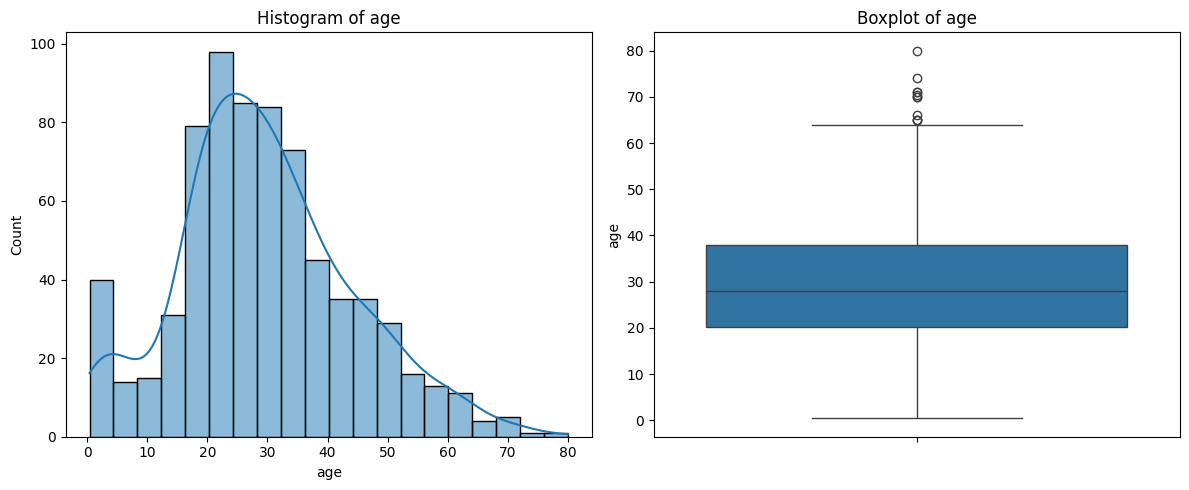

In [25]:
plot_numerical_column(df, 'age')

Chekc the continues varaible to see wheather is normally distributed or not . This is very imporatn to choose correct Correlation method.

In [26]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
##df.drop('deck', axis=1, inplace= True)
##df.dropna(inplace=True)

# Time for Practice Part 2

# Correlation analysis

### English:
- Pearson Correlation Coefficient: Pearson's correlation measures the linear relationship between two continuous variables. It assumes that both variables are normally distributed and have a linear relationship.
- Kendall Tau Correlation Coefficient: Kendall's tau is a non-parametric measure that assesses the ordinal association between two variables. (which is suitable for ordinal data, as well as for continuous data that do not meet the assumptions of normality required for Pearson's correlation)
- Spearman Rank Correlation: Spearman's correlation is another non-parametric measure (Not normal disttibution). It does not assume normal distribution.
- Chi-square test for categorical variables, but it treats ordinal data as nominal (this is a limitation).
### German:
- Pearson-Korrelationskoeffizient: Die Pearson-Korrelation misst die lineare Beziehung zwischen zwei kontinuierlichen Variablen. Sie setzt voraus, dass beide Variablen normal verteilt sind und eine lineare Beziehung haben.
- Kendall Tau Korrelationskoeffizient: Kendall's Tau ist ein nicht-parametrisches Maß, das die ordinale Assoziation zwischen zwei Variablen bewertet.
- Spearman Rank Korrelation: Die Spearman-Korrelation ist ein weiteres nicht-parametrisches Maß. Es setzt keine Normalverteilung voraus.
- Chi-Quadrat-Test für kategoriale Variablen, behandelt jedoch ordinale Daten als nominal (dies ist eine Einschränkung).


- Spearman's Rank correlation coefficient is indeed suitable for both ordinal datasets and non-parametric continuous values. It is a non-parametric measure that assesses the strength and direction of association between two variables. ( it is the similar with pearson correlation )
-  Kendall's Tau is particularly useful for small sample sizes because it is less affected by the distribution of data
- Spearman's correlation is suitable for larger datasets compared to Kendall's Tau and is a bit more straightforward to interpret and calculate.

In [29]:
method : {'pearson', 'kendall', 'spearman'}

#df.corr(method='pearson')

## Correlation in non_binary_columns variables

In [30]:
non_binary_columns

['deck', 'class', 'sibsp', 'pclass', 'parch', 'embark_town', 'who', 'embarked']

In [31]:
df[non_binary_columns].head()

,deck,class,sibsp,pclass,parch,embark_town,who,embarked
1,C,First,1,1,0,Cherbourg,woman,C
3,C,First,1,1,0,Southampton,woman,S
6,E,First,0,1,0,Southampton,man,S
10,G,Third,1,3,1,Southampton,child,S
11,C,First,0,1,0,Southampton,woman,S


In [32]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((rcorr-1), (kcorr-1)))



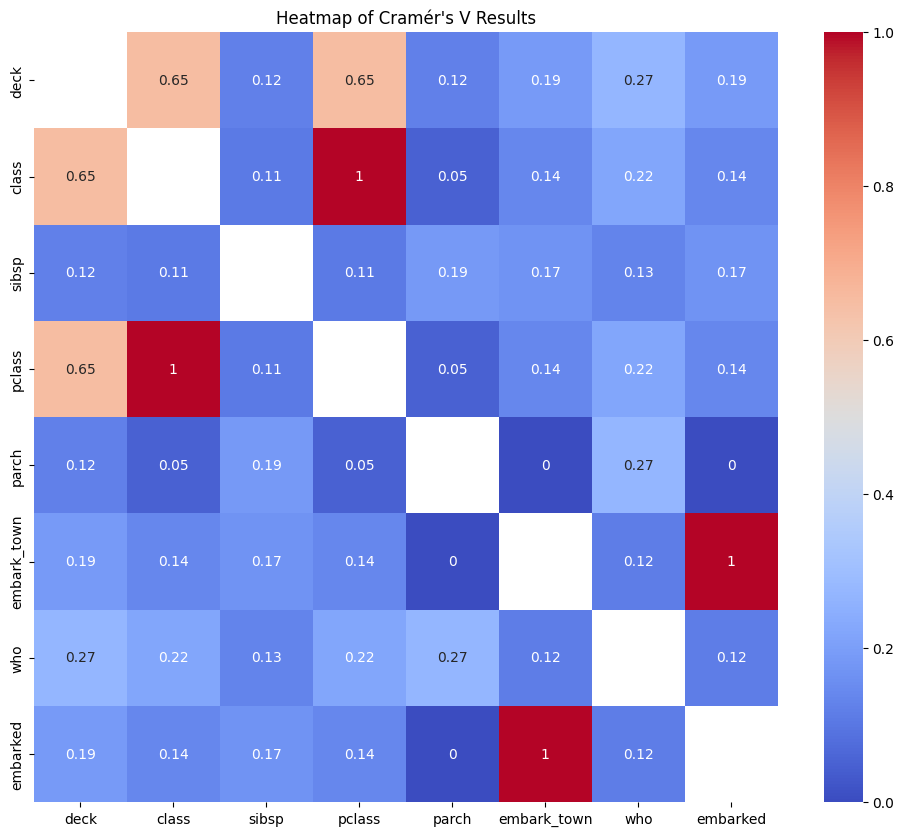

In [33]:
cramers_v_results = pd.DataFrame(index=non_binary_columns, columns=non_binary_columns)
for col1 in non_binary_columns:
    for col2 in non_binary_columns:
        if col1 != col2:
            cramers_v_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_results
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_results.astype(float), annot=True, cmap='coolwarm')
plt.title("Heatmap of Cramér's V Results")
plt.show()

## Correlation in continuous variables and  binary columns

### English:
- First, before finding the correlation, we need to convert categorical ( binary) columns to numerical values.
### German:
- Zuerst müssen wir vor dem Auffinden der Korrelation kategoriale Spalten (binary) in numerische Werte umwandeln.

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [35]:
for i in df[binary_columns]:
    df[i] = le.fit_transform(df[i])

In [36]:
df[binary_columns].head()

,survived,sex,adult_male,alive,alone
1,1,0,0,1,0
3,1,0,0,1,0
6,0,1,1,0,1
10,1,0,0,1,0
11,1,0,0,1,1


In [37]:
numerical_columns

['age', 'fare']

In [38]:
ordinal_columns=['pclass' , 'sibsp']

### English:
As "pclass" and "sibsp" can be considered as ordinal categorical datasets, we can use Spearman correlation for those columns.
### German:
Da "pclass" und "sibsp" als ordinal-kategoriale Datensätze betrachtet werden können, können wir für diese Spalten die Spearman-Korrelation verwenden.

In [39]:
method : {'pearson', 'kendall', 'spearman'}
#df.corr(method='pearson')

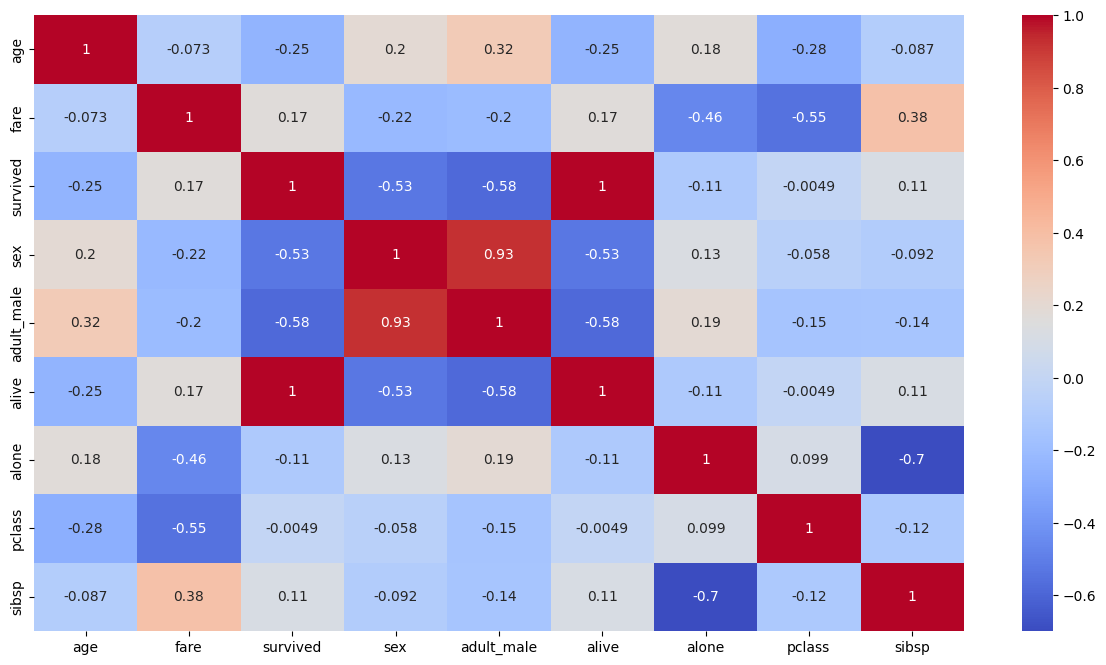

In [40]:
plt.figure(figsize=(15, 8))  
correlation_matrix = df[numerical_columns+binary_columns +ordinal_columns] .corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# Time for Practice Part 3

# Correlation analysis  with Visualizing

 ### Visualizing the relationship between a categorical variable and  numerical columns 

In [41]:
from ipywidgets import interact, Dropdown, FloatSlider, HBox
import plotly.graph_objs as go
import pandas as pd
import plotly.subplots as sp

In [42]:

numerical_columns_sorted = sorted(numerical_columns)
categorical_columns_sorted = sorted(categorical_columns)
numerical_dropdown = Dropdown(options=numerical_columns_sorted, description='Numerical Column:')
categorical_dropdown = Dropdown(options=categorical_columns_sorted, description='Categorical Column:')


In [43]:

def update_plot(numerical_column, categorical_column):
    data = []
    categories = df[categorical_column].unique().tolist()
    if pd.isna(categories).any():
        categories.append(np.nan)
    for category in categories:
        if pd.isna(category):
            category_name = 'missing'  
            subset = df[pd.isna(df[categorical_column])][numerical_column]
        else:
            category_name = str(category)
            subset = df[df[categorical_column] == category][numerical_column]

        data.append(
            go.Box(
                y=subset,
                name=category_name
            )
        )
    fig = go.Figure(data=data)
    fig.update_layout(title=f'Distribution of {numerical_column} by {categorical_column} (including Missing)')
    fig.show()
interact(update_plot, numerical_column=numerical_dropdown, categorical_column=categorical_dropdown)

interactive(children=(Dropdown(description='Numerical Column:', options=('age', 'fare'), value='age'), Dropdow…

<function __main__.update_plot(numerical_column, categorical_column)>

 ### Visualization for Two Numerical Columns:

In [44]:
numerical_columns_sorted = sorted(numerical_columns) 
def update_numerical_plot(x_column, y_column):
    fig = sp.make_subplots(rows=2, cols=2, 
                           column_widths=[0.90, 0.15], 
                           row_heights=[0.15, 0.85],
                           shared_xaxes=True,
                           shared_yaxes=True,
                           vertical_spacing=0.02,
                           horizontal_spacing=0.02,
                           subplot_titles=(None, None, f'Scatter Plot of {x_column} vs {y_column}'))
    fig.add_trace(go.Scatter(x=df[x_column], y=df[y_column], mode='markers', name='scatter'), row=2, col=1)
    fig.add_trace(go.Histogram(x=df[x_column], name=f'histogram {x_column}'), row=1, col=1)
    fig.add_trace(go.Histogram(y=df[y_column], name=f'histogram {y_column}', orientation='h'), row=2, col=2)
    fig.update_layout(height=800, width=1200, showlegend=False)
    fig.show()
x_dropdown = Dropdown(options=numerical_columns_sorted, description='X-axis:')
y_dropdown = Dropdown(options=numerical_columns_sorted, description='Y-axis:')
interact(update_numerical_plot, x_column=x_dropdown, y_column=y_dropdown)


interactive(children=(Dropdown(description='X-axis:', options=('age', 'fare'), value='age'), Dropdown(descript…

<function __main__.update_numerical_plot(x_column, y_column)>

### Visualization for Two Categorical Columns:


In [45]:
import plotly.graph_objs as go
from ipywidgets import Dropdown, interact
import pandas as pd

# Assuming df is your DataFrame and categorical_columns is a list of column names.

def update_categorical_plot(column1, column2):
    if column1 == column2:
        print("The same column is selected for both axes. Please select different columns.")
        return
    grouped_data = df.groupby([column1, column2]).size().reset_index(name='counts')
    data = []
    categories = sorted(df[column2].unique())
    for category in categories:
        data.append(
            go.Bar(
                name=str(category),
                x=grouped_data[grouped_data[column2] == category][column1],
                y=grouped_data[grouped_data[column2] == category]['counts']
            )
        )
    fig = go.Figure(data=data)
    fig.update_layout(
        barmode='group',
        title=f'Grouped Bar Chart of {column1} and {column2}',
        xaxis_title=column1,
        yaxis_title='Count',
        xaxis={'categoryorder':'total descending'}  # This will order the x-axis based on count
    )
    fig.show()

# Example usage:
categorical_columns_sorted = sorted(categorical_columns)  # Ensure categorical_columns is defined
column1_dropdown = Dropdown(options=categorical_columns_sorted, description='Column 1:')
column2_dropdown = Dropdown(options=categorical_columns_sorted, description='Column 2:')
interact(update_categorical_plot, column1=column1_dropdown, column2=column2_dropdown)


interactive(children=(Dropdown(description='Column 1:', options=('adult_male', 'alive', 'alone', 'class', 'dec…

<function __main__.update_categorical_plot(column1, column2)>

In [46]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,1,0
3,1,1,0,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,1,0
6,0,1,1,54.0,0,0,51.8625,S,First,man,1,E,Southampton,0,1
10,1,3,0,4.0,1,1,16.7000,S,Third,child,0,G,Southampton,1,0
11,1,1,0,58.0,0,0,26.5500,S,First,woman,0,C,Southampton,1,1


In [47]:
df.groupby('class')['alone'].count()

C:\Users\habdullayev\AppData\Local\Temp\ipykernel_7080\821690737.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



class
First     157
Second     15
Third      10
Name: alone, dtype: int64

# Time for Practice Part 3